In [115]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [116]:
df = pd.read_csv('water_dataX.csv',encoding='ISO-8859-1',low_memory=False)


In [117]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [118]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [119]:
df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [120]:
df.shape

(1991, 12)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
STATION CODE                        1991 non-null object
LOCATIONS                           1991 non-null object
STATE                               1991 non-null object
Temp                                1991 non-null object
D.O. (mg/l)                         1991 non-null object
PH                                  1991 non-null object
CONDUCTIVITY (µmhos/cm)             1991 non-null object
B.O.D. (mg/l)                       1991 non-null object
NITRATENAN N+ NITRITENANN (mg/l)    1991 non-null object
FECAL COLIFORM (MPN/100ml)          1991 non-null object
TOTAL COLIFORM (MPN/100ml)Mean      1991 non-null object
year                                1991 non-null int64
dtypes: int64(1), object(11)
memory usage: 101.2+ KB


Handling the Missing Data

In [122]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [123]:
df.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [124]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [125]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [126]:
df['Temp'].fillna(df['Temp'].mean(),inplace=True)
df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)
df['PH'].fillna(df['PH'].mean(),inplace=True)
df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)
df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [127]:
df.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [128]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [129]:
df=df.rename(columns = {'D.O. (mg/l)': 'do'})
df=df.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
df=df.rename(columns = {'B.O.D. (mg/l)': 'bod'})
df=df.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)': 'na'})
df=df.rename(columns = {'FECAL COLIFORM (MPN/100ml)': 'fc'})
df=df.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
df=df.rename(columns = {'STATION CODE': 'station'})
df=df.rename(columns = {'LOCATIONS': 'location'})
df=df.rename(columns = {'STATE': 'state'})
df=df.rename(columns = {'PH': 'ph'})

In [130]:
df.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


Water Quality Index Calculation

In [131]:
#calulation of Ph
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [132]:
#calculation of dissolved oxygen
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [133]:
#calculation of total coliform
df['nco']=df.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [134]:
#calc of B.D.O
df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [135]:
#calculation of electrical conductivity
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [136]:
#Calulation of nitrate
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [137]:
df.head()
df.dtypes

station      object
location     object
state        object
Temp        float64
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [138]:
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 
df

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [139]:
#calculation overall wqi for each year
average=df.groupby('year')['wqi'].mean()

In [140]:
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [141]:
data=average.reset_index(level=0,inplace=False)
data

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


In [151]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [143]:
df.drop(["location"],axis=1,inplace=True,errors='ignore')

In [144]:
df.drop(["station"],axis=1,inplace=True,errors='ignore')

In [145]:
df.drop(["state"],axis=1,inplace=True,errors='ignore')

In [146]:
x=df.iloc[:,0:7].values
x.shape

(1991, 7)

In [148]:
y=df.iloc[:,-1:].values
y.shape

(1991, 1)

In [149]:
print(x)

[[3.06000000e+01 6.70000000e+00 7.50000000e+00 ... 6.94004877e+00
  1.00000000e-01 2.70000000e+01]
 [2.98000000e+01 5.70000000e+00 7.20000000e+00 ... 2.00000000e+00
  2.00000000e-01 8.39100000e+03]
 [2.95000000e+01 6.30000000e+00 6.90000000e+00 ... 1.70000000e+00
  1.00000000e-01 5.33000000e+03]
 ...
 [2.80000000e+01 7.60000000e+00 9.80000000e+01 ... 1.20000000e+00
  1.62307871e+00 5.70000000e+02]
 [2.80000000e+01 7.70000000e+00 9.10000000e+01 ... 1.30000000e+00
  1.62307871e+00 5.62000000e+02]
 [2.90000000e+01 7.60000000e+00 1.10000000e+02 ... 1.10000000e+00
  1.62307871e+00 5.46000000e+02]]


In [150]:
print(y)

[[84.46]
 [76.96]
 [79.28]
 ...
 [66.44]
 [66.44]
 [66.44]]


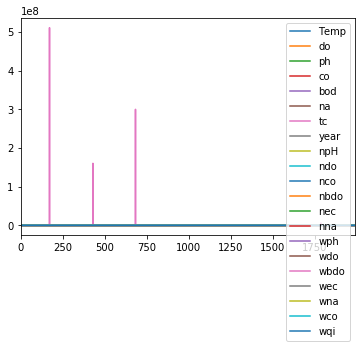

In [152]:
df.plot()

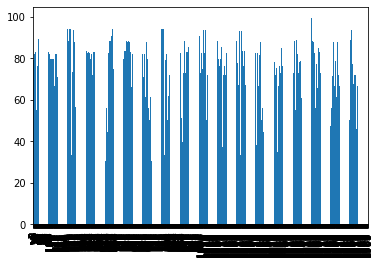

In [153]:
df['wqi'].plot.bar(x='wqi')

Text(0, 0.5, 'wqi')

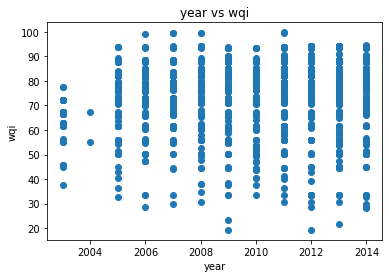

In [154]:
plt.scatter(df['year'],df['wqi'])
plt.title('year vs wqi')
plt.xlabel('year')
plt.ylabel('wqi')

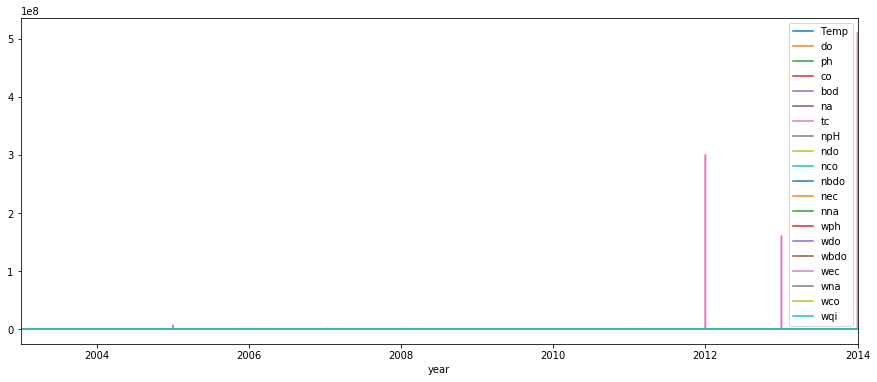

In [156]:
import matplotlib.pyplot as plt
df=df.set_index('year')
df.plot(figsize=(15,6))
plt.show()

Random Forest Regression

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [157]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [158]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)


F:\Users\DEVA DHARSHINI M\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
y_pred = regressor.predict(x_test)

Model Evaluation

In [159]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.0048521303258215
MSE: 5.728742416040103
RMSE: 2.3934791446845955


In [160]:
#accuracy of the model
metrics.r2_score(y_test, y_pred)

0.9687726342666486

Save The Model

In [166]:
import pickle
pickle.dump(regressor,open('wqi.pkl', 'wb'))
model = pickle.load(open('wqi.pkl','rb'))